In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


/tmp/ipykernel_4650/997585499.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [20]:
df = pd.read_csv("nr_gx_hocine.csv", sep = ",", index_col= "Ensembl_ID")
df.head()

,ENSG00000003137,ENSG00000003989,ENSG00000004468,ENSG00000004776,ENSG00000004897,ENSG00000005020,ENSG00000005108,ENSG00000005175,ENSG00000005249,ENSG00000005513,...,ENSG00000275832,ENSG00000276070,ENSG00000276409,ENSG00000276418,ENSG00000277161,ENSG00000277957,ENSG00000278318,ENSG00000278615,ENSG00000280987,cl
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3870-01A,-1.286937,-0.705065,-0.929976,0.421267,-0.997507,-0.265709,-0.103897,-1.165818,-1.377329,-1.587388,...,-0.253259,0.266248,-1.450667,-1.611563,-1.161838,-2.334001,-0.188997,-1.147065,-1.862966,1
TCGA-AA-3696-01A,-3.366378,-1.159320,-3.058207,-4.132610,-2.334947,-1.981988,-2.588803,-1.703634,-2.621653,-1.268934,...,-2.634787,-4.024211,-3.242426,-0.918416,-3.214611,-2.334001,-2.386222,-2.687510,-2.689645,1
TCGA-AA-3680-01A,-1.808234,-1.757157,-0.697353,-0.997116,-0.699058,0.118828,-0.756222,-0.650046,-0.791427,-1.027772,...,-1.111063,-2.078301,-1.296516,-0.512951,-0.695219,-2.334001,-0.188997,-1.793692,-1.544512,1
TCGA-A6-2682-01A,-2.806763,-0.840867,-1.805445,-1.041568,-1.856602,-1.196528,-2.029188,-1.708363,-2.459134,-2.973682,...,-1.839858,-0.274707,-1.632988,-2.304710,-1.594702,-2.334001,-2.386222,-1.517438,-3.942408,1
TCGA-AA-A02H-01A,-2.673231,-2.140150,-2.721735,-2.398009,-2.097473,-2.276553,-2.183338,-1.766916,-2.564495,-2.057392,...,-1.501084,-2.152409,-1.296516,-2.304710,-2.330409,-2.334001,-2.386222,-1.588897,-3.536943,1


In [21]:
df.loc[:, 'ENSG00000003137']

Ensembl_ID
TCGA-AA-3870-01A   -1.286937
TCGA-AA-3696-01A   -3.366378
TCGA-AA-3680-01A   -1.808234
TCGA-A6-2682-01A   -2.806763
TCGA-AA-A02H-01A   -2.673231
TCGA-A6-A567-01A   -1.919459
TCGA-AA-3494-01A   -1.808234
TCGA-AA-3973-01A   -2.044622
TCGA-CM-4747-01A   -1.456836
TCGA-AA-A02J-01A   -1.862301
TCGA-AA-3972-01A   -0.230884
TCGA-A6-2683-01A   -2.187723
TCGA-AA-3930-01A   -1.661630
TCGA-AZ-4614-01A   -1.808234
TCGA-AA-3867-01A   -1.862301
TCGA-AA-3679-01A   -1.919459
TCGA-AZ-6600-01A    0.377226
TCGA-A6-5662-01A    0.594435
TCGA-F4-6809-01A    0.530531
TCGA-G4-6315-01A   -1.169154
TCGA-G4-6303-01A    0.819481
TCGA-AY-A8YK-01A   -1.980084
TCGA-AY-5543-01A   -1.089111
TCGA-A6-6652-01A   -0.435185
TCGA-CM-5868-01A   -0.108282
TCGA-D5-6929-01A   -0.924031
TCGA-5M-AAT6-01A    0.230934
TCGA-AM-5820-01A   -0.782381
TCGA-5M-AAT4-01A   -1.115087
TCGA-CM-6675-01A    1.208333
TCGA-A6-6142-01A   -0.061325
TCGA-AZ-6607-01A   -0.658328
TCGA-AA-A02K-01A   -1.533797
TCGA-A6-6648-01A    0.429111
TCG

In [22]:
# Change this to your gene dimension
X = df.iloc[: , 0:1855]
y = df.iloc[ : , 1855]
y

Ensembl_ID
TCGA-AA-3870-01A    1
TCGA-AA-3696-01A    1
TCGA-AA-3680-01A    1
TCGA-A6-2682-01A    1
TCGA-AA-A02H-01A    1
TCGA-A6-A567-01A    1
TCGA-AA-3494-01A    1
TCGA-AA-3973-01A    1
TCGA-CM-4747-01A    1
TCGA-AA-A02J-01A    1
TCGA-AA-3972-01A    1
TCGA-A6-2683-01A    1
TCGA-AA-3930-01A    1
TCGA-AZ-4614-01A    1
TCGA-AA-3867-01A    1
TCGA-AA-3679-01A    1
TCGA-AZ-6600-01A    2
TCGA-A6-5662-01A    2
TCGA-F4-6809-01A    2
TCGA-G4-6315-01A    2
TCGA-G4-6303-01A    2
TCGA-AY-A8YK-01A    2
TCGA-AY-5543-01A    2
TCGA-A6-6652-01A    2
TCGA-CM-5868-01A    2
TCGA-D5-6929-01A    2
TCGA-5M-AAT6-01A    2
TCGA-AM-5820-01A    2
TCGA-5M-AAT4-01A    2
TCGA-CM-6675-01A    2
TCGA-A6-6142-01A    2
TCGA-AZ-6607-01A    2
TCGA-AA-A02K-01A    2
TCGA-A6-6648-01A    2
TCGA-G4-6294-01A    2
TCGA-G4-6297-01A    2
TCGA-CM-6678-01A    2
TCGA-AA-3713-01A    2
TCGA-AZ-4323-01A    2
Name: cl, dtype: int64

In [23]:
def get_models(svm_c, n_features):
    models = dict()
    for i in range(2, n_features):
        rfe = RFE(estimator=SVC(kernel='linear', C=svm_c, gamma=0.1), n_features_to_select=i)
        model = SVC(kernel='linear', C=svm_c)
        models[str(i)] = Pipeline(steps=[('s',rfe), ('m',model)])
    return models

In [24]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=7, random_state=123)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [25]:
def run_rfe(models, X, y):    
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    return results, names

In [26]:
def selected_features(svm_c, n, X, y, xcols):
    rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=n)
    rfe.fit(X,y)
    cols = []
    for i in range(X.shape[1]):
        # print('Column: %d, Selected %s, Rank: % .3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if rfe.support_[i]:
            cols.append(xcols[i])
    return cols

>2 0.985 (0.050)
>3 0.977 (0.062)
>4 0.985 (0.050)
>5 0.988 (0.045)
>6 0.993 (0.036)
>7 0.996 (0.028)
>8 0.996 (0.028)
>9 0.993 (0.036)
>10 0.993 (0.036)
>11 0.993 (0.036)
>12 0.993 (0.036)
>13 0.993 (0.036)
>14 0.996 (0.028)
>15 0.996 (0.028)
>16 0.997 (0.024)
>17 0.997 (0.024)
>18 0.997 (0.024)
>19 0.993 (0.036)


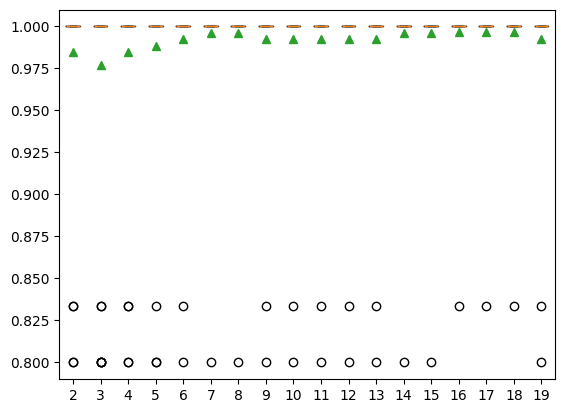

<Figure size 640x480 with 0 Axes>

In [27]:
svm_c = 5
xcols = X.columns
#n_features = len(xcols)
n_features = 20
models = get_models(svm_c, n_features)
scaler = StandardScaler()
scaler.fit(X)
#X = scaler.transform(X)
#y = np.ravel(y)
#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)

results, names = run_rfe(models, X, y)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
pyplot.savefig("RFE.png")

In [28]:
gene_remained_FRE =selected_features(svm_c, 16, X, y, xcols)

In [29]:
gene_remained_FRE 


['ENSG00000099977',
 'ENSG00000115604',
 'ENSG00000124882',
 'ENSG00000129226',
 'ENSG00000139269',
 'ENSG00000160201',
 'ENSG00000160469',
 'ENSG00000174945',
 'ENSG00000197467',
 'ENSG00000204967',
 'ENSG00000254772',
 'ENSG00000258102',
 'ENSG00000259171',
 'ENSG00000262304',
 'ENSG00000271741',
 'ENSG00000274512']

In [30]:
gene_remained_FRE =selected_features(svm_c, 10, X, y, xcols)
gene_remained_FRE 

['ENSG00000099977',
 'ENSG00000115604',
 'ENSG00000129226',
 'ENSG00000139269',
 'ENSG00000160469',
 'ENSG00000174945',
 'ENSG00000254772',
 'ENSG00000259171',
 'ENSG00000271741',
 'ENSG00000274512']

In [31]:
gene_remained_FRE =selected_features(svm_c, 20, X, y, xcols)
gene_remained_FRE 

['ENSG00000099977',
 'ENSG00000107731',
 'ENSG00000115604',
 'ENSG00000124882',
 'ENSG00000129226',
 'ENSG00000135480',
 'ENSG00000139269',
 'ENSG00000160201',
 'ENSG00000160469',
 'ENSG00000174945',
 'ENSG00000197467',
 'ENSG00000204967',
 'ENSG00000254772',
 'ENSG00000258102',
 'ENSG00000259171',
 'ENSG00000260220',
 'ENSG00000262304',
 'ENSG00000271741',
 'ENSG00000274512',
 'ENSG00000275718']